Python programlamaya giriş konulu yazı dizimizdeki son birkaç bölümde, Python'da tanımlı temel veri tiplerinin kullanımının ayrıntılarından bahsettik. Bu yazıdaki konumuz, daha önce bahsetmediğimiz bir veri yapısı olan "kümeler". Dizinin bütün yazılarına erişmek için <a href="http://www.veridefteri.com/category/python-giris/"><em>Python Programlamaya Giriş</em></a> kategorimize bakabilirsiniz. Bu dizideki yazılar ayrıca Jupyter defterleri halinde <a href="https://github.com/sibirbil/VeriDefteri/tree/master/Python_Programlama">GitHub depomuzda</a> da mevcut.

Bir küme, listelerden farklı olarak, belli bir sırası bulunmayan bir veri topluluğudur; yani elemanlarına indeksleme ile erişilemez. Ayrıca, matematiksel kümeler gibi, aynı elemandan birden fazla barındıramaz. Python'da bir küme yaratmanın birinci yolu, nesneleri küme parantezinde toplayarak vermektir:

In [1]:
s = {(1,2,3),"abc",123,-1,"abc",(1,2,3)}
s

{'abc', 123, -1, (1, 2, 3)}

İkinci yolu ise, `set()` fonksiyonuna bir sıralı nesne vermektir:

In [2]:
set([1,3,1,-2,"abc", "abc"])

{1, 'abc', 3, -2}

Bir dize de karakterlerden oluşan bir sıralı nesnedir, bu yüzden `set()` fonksiyonu ile dizenin karakterlerinin kümesini elde ederiz.

In [3]:
set("ananas")

{'a', 'n', 's'}

Örneklerden de gördüğünüz gibi kümelerde, matematiksel tanıma uygun olarak, bir eleman sadece bir kere mevcut olabilir. Orijinal sıralı nesnede mükerrer eleman varsa alınmaz.

Python'da bir liste, bir kümenin elemanı olamaz. Denemeye kalkarsanız hata mesajı alırsınız.

In [4]:
{1,2, [1,2,3]}

TypeError: unhashable type: 'list'

Bir kümedeki elemanların _hashable_ olabilmesi, yani bir hash fonksiyonuna verilebilmesi gerekir. Bu da genellikle değiştirilemez (immutable) veri tipleri olmalarını gerektirir. Sayılar, çokuzlar, dizeler küme elemanı olmaya uygundurlar. Buna karşılık listeler, sözlükler ve kümeler, küme elemanı olamazlar (evet, matematiksel tanımda kümeler başka kümelerin elemanı olabilir, ama Python'da teknik sebeplerle bu mümkün olmaz).

Boş küme için `set()` fonksiyonu tek başına kullanılmalıdır. Boş küme parantezleri `{}` kullanmak boş bir sözlük oluşturur, küme değil.

In [5]:
type(set()), type({})

(set, dict)

Bir kümenin kaç elemanlı olduğunu bulmak için `len()` fonksiyonu kullanılabilir.

In [6]:
s = {1,3,1,2,1,3,2}
len(s)

3

Bir elemanın kümenin içinde olup olmadığını sorgulamak için `e in s` kullanılabilir. Ters şart olarak da `e not in s` kullanılabilir.

In [7]:
1 in s, 4 in s, 4 not in s

(True, False, True)

Küme elemanları üzerinde `for e in s` yapısıyla döngü kurulabilir.

In [8]:
for e in s:
    print(e,e**2)

1 1
2 4
3 9


## Küme karşılaştırmaları
Küme nesneleri `==`, `<`, `>` gibi karşılaştırma işlemlerini yeniden tanımlayarak küme teorisine uyumlu hale getirirler. Söz gelişi `A <= B` şartı, A kümesi B kümesinin bir alt kümesi ise doğrudur.

In [9]:
Avrupa = {"Almanya","Fransa","İspanya","Portekiz","Rusya","Türkiye"}
Asya = {"Rusya","Türkiye","Çin","Hindistan"}
İberya = {"İspanya","Portekiz"}

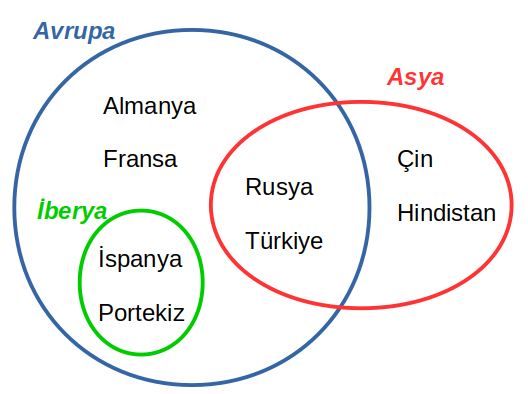

In [39]:
from IPython import display
display.Image("img/Venn_ulkeler.png",width=300)

Eşitlik (`==`) ve eşitdeğil (`!=`) işlemleri iki kümenin eşit olup olmadığını test eder.

In [11]:
Avrupa == Avrupa, Avrupa != Asya

(True, True)

Alt küme testi için `<=` işlemi, öz alt küme testi için `<` işlemi kullanılabilir.

In [12]:
İberya < Avrupa, Asya < Asya, Asya <= Asya

(True, False, True)

Kapsama işlemi için `>` ve `>=` işlemleri kullanılır.

In [13]:
Avrupa > İberya, Asya > Asya, Asya >= Asya

(True, False, True)

## Bileşim, kesişim, fark, simetrik fark

İki kümenin bileşim kümesini `|` işlemi ile elde ederiz.

In [14]:
Avrupa | Asya

{'Almanya',
 'Fransa',
 'Hindistan',
 'Portekiz',
 'Rusya',
 'Türkiye',
 'Çin',
 'İspanya'}

Kümelerin kesişim kümesi ise `&` işlemi ile elde edilir.

In [15]:
Avrupa & Asya

{'Rusya', 'Türkiye'}

Fark işlemi `A-B`, `A` kümesinde olup `B` kümesinde olmayanları verir.

In [16]:
Avrupa - İberya

{'Almanya', 'Fransa', 'Rusya', 'Türkiye'}

Simetrik fark `A^B` işlemi, ya `A` kümesinde ya da `B` kümesinde olan, ama ikisinde birden olmayan elemanları verir. Bu işlem `A^B == (A|B) - (A&B)` eşitliğini sağlar.

In [17]:
Avrupa ^ Asya

{'Almanya', 'Fransa', 'Hindistan', 'Portekiz', 'Çin', 'İspanya'}

## Donuk kümeler

Python, kümelere alternatif olarak bir de _donuk küme_ (frozen set) nesnesi sunar. İkisi arasındaki tek fark, donuk kümelerin bir kere tanımlandıktan sonra değiştirilemez (immutable) olmasıdır. Yani donuk kümeye eleman eklenip çıkarılamaz, kümede değişiklik yapılamaz. Değiştirilemezlik sayesinde donuk kümeler _hashable_ nesnelerdir. Böylece sözlüklerde anahtar olarak kullanılabilirler, veya küme elemanı olabilirler.

In [18]:
s = frozenset((1,2,"abc",frozenset("abc")))
s

frozenset({frozenset({'a', 'b', 'c'}), 1, 2, 'abc'})

Buraya kadar gösterdiğimiz bütün işlemler, karşılaştırmalar, bileşim, kesişim ve fark işlemleri donuk kümelerde de aynen kullanılabilir. Ancak buradan sonra anlatılacak işlemler kümelerde değişiklik yapmak için kullanıldığından, sadece normal (donuk olmayan) kümeler için geçerlidirler.

## Kümelere eleman ekleme ve çıkarma

Bir kümeye tek tek eleman eklemek için `add()` metodunu kullanırız.

In [19]:
s = set()

s.add(1)
s.add("abc")
s.add(2)
s.add(1)

s

{1, 'abc', 2}

Mevcut bir elemanı kümeden silmek için ise `remove()` metodu kullanılabilir.

In [20]:
s.remove(2)
s

{1, 'abc'}

Ancak, belirtilen eleman kümede yoksa, `remove()` çağrısı bir `KeyError` hatası verir.

In [21]:
s.remove(2)

KeyError: 2

Bu hata mesajını yakalayıp ona göre bir işlem yapmanız gereken durumlar olabilir. Eğer böyle bir niyetiniz yoksa `discard()` metodunu kullanabilirsiniz. Bu işlem de bir elemanı kümeden kaldırır, ama kümede o eleman mevcut değilse hata mesajı vermez.

In [22]:
s.discard(2)

Bir kümedeki bütün elemanları silmek için `clear()` metodunu kullanırız.

In [23]:
s.clear()
s

set()

Bir kümeden herhangi bir elemanı döndüren ve o elemanı kümeden çıkaran bir işlem için `pop()` metodu kullanılabilir. Kümede eleman kalmadıysa, `pop()` metodu `KeyError` hatası verir.

In [24]:
s = {1,"abc",(1,2,3)}
s.pop(), s.pop(), s.pop()

(1, 'abc', (1, 2, 3))

In [25]:
s.pop()

KeyError: 'pop from an empty set'

## Küme güncelleme işlemleri

Sayılarda ve listelerde `+=`, `*=` gibi güncelleme işlemleri olduğunu görmüştük. Kümelerde de, yukarıda gördüğümüz bileşim, kesişim, fark, simetrik fark işlemlerini `|=`, `&=`, `-=`, `^=` yapılarıyla güncelleme işlemi haline getirmek mümkün.

Kesişim kümesi boş olmayan iki küme üretelim:

In [26]:
s1 = set(range(5))
s2 = set(range(2,7))
s1, s2

({0, 1, 2, 3, 4}, {2, 3, 4, 5, 6})

Şimdi `s1` kümesini `s1` ve `s2`'nin bileşim kümesi olacak şekilde güncelleyelim:

In [27]:
s1 |= s2  # s1 = s1 | s2 ile aynı
s1,s2

({0, 1, 2, 3, 4, 5, 6}, {2, 3, 4, 5, 6})

`s1`'i eski haline getirip, `s1` ile `s2`'nin kesişim kümeleri olacak şekilde güncelleyelim:

In [28]:
s1 = set(range(5))
s1 &= s2  # s1 = s1 & s2 ile aynı
s1

{2, 3, 4}

Aynısını fark ve simetrik fark işlemleriyle yapalım:

In [29]:
s1 = set(range(5))
s1 -= s2  # s1 = s1 - s2 ile aynı
s1

{0, 1}

In [30]:
s1 = set(range(5))
s1 ^= s2   # s1 = s1 ^ s2 ile aynı
s1

{0, 1, 5, 6}

## Uygulamalar

### Mükerrer elemanları kaldırmak
Bir listeyi kümeye çevirmek mükerrer elemanların atılmasını sağlar. Tekil elemanların listesini bulmak için bu özelliği kullanabiliriz.

In [31]:
L = [1,2,3,4,1,2,3,4,1,3,2,1,4,1,2,1,3,1]
list(set(L))

[1, 2, 3, 4]

Elbette aynı yöntemi çokuzlar ve dizelerle de uygulayabiliriz.

In [32]:
dize = "korkma sönmez bu şafaklarda yüzen al sancak"
"".join(sorted(set(dize)))

' abcdefklmnorsuyzöüş'

<h3>Elemanın varlığını test etmek</h3>
Bir kümede belli bir elemanın mevcudiyetini test etmek, listede test etmekten çok daha hızlıdır. Bunun sebebi, bir eleman aranırken listenin baştan sona taranmasıdır. Bu yüzden, liste uzadıkça listede bir elemanın varlığının tespiti için gereken zaman artar. Kümelerde ise hash fonksiyonu kullanarak bir tek işlemde test yapılabilir; işlem kümedeki eleman sayısına bağlı değildir.

Bu hız farkını görmek için 1-1.000.000 arasındaki sayılardan oluşan bir liste ve bir küme oluşturalım. Mükerrer eleman olmadığı için ikisi de aynı uzunlukta olacak.

In [33]:
L = list(range(1,1000001))
s = set(L)

In [34]:
from random import randint

1 ile 2.000.000 arasında rastgele bir sayı seçelim ve sayının listede ve kümede varlığını test edelim. Yüzde elli ihtimalle sayı mevcut olmayacak. `%%timeit` hücre sihri ile bu işlemi defalarca tekrarlayıp ortalama süresini bulalım.

In [35]:
%%timeit
n = randint(1,2000000)
n in L

13.4 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
%%timeit
n = randint(1,2000000)
n in s

2.08 µs ± 68.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Küme içinde aramanın listede aramaya göre bin kat daha hızlı olduğunu görebiliyoruz. 

Şimdi aynı işlemi bir sözlük ile yapalım. Anahtar değerleri 1-1.000.000 arasında olan büyük bir sözlük yaratalım ve yine rastgele seçilmiş anahtar değerlerini sorgulayalım.

In [37]:
D = dict.fromkeys(L)

In [38]:
%%timeit
n = randint(1,2000000)
n in D

2.71 µs ± 247 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Sözlüklerde eleman tespiti kümelerdeki kadar hızlıdır, çünkü sözlüklerde de anahtarlar hash fonksiyonlarıyla aranır. Bütün sözlük elemanlarını taramak gerekmez. Yaptığımız zaman ölçümü de bunu gösteriyor.